<a href="https://colab.research.google.com/github/gyimesbalint/DL_project/blob/main/fitting_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing datasets

In [80]:
# https://drive.google.com/file/d/1pmNSD1nbYHEAiP065s4akRXHMWFs9Dqw/view?usp=sharing DBpedia train.csv
# https://drive.google.com/file/d/1mKededzdbJsWQnwsu-R_WSILYSvNEY7c/view?usp=sharing DBpedia test.csv
!pip install gdown
!gdown --id 1pmNSD1nbYHEAiP065s4akRXHMWFs9Dqw --output train.csv  #import train.csv from drive
!gdown --id 1mKededzdbJsWQnwsu-R_WSILYSvNEY7c --output test.csv   #import test.csv from drive

Downloading...
From: https://drive.google.com/uc?id=1pmNSD1nbYHEAiP065s4akRXHMWFs9Dqw
To: /content/train.csv
100% 174M/174M [00:01<00:00, 149MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mKededzdbJsWQnwsu-R_WSILYSvNEY7c
To: /content/test.csv
100% 21.8M/21.8M [00:00<00:00, 133MB/s]


In [81]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('train.csv', encoding='utf8',header=None) #read csv to dataframe
test_data = pd.read_csv('test.csv', encoding='utf8',header=None)   #read csv to dataframe

train_data.where(train_data[0] < 6, inplace = True)  #select first 5 categories
train_data = train_data[train_data[0].notnull()]     #remove NaN values

test_data.where(test_data[0] < 6, inplace = True)    #select first 5 categories
test_data = test_data[test_data[0].notnull()]        #remove NaN values

In [82]:
training_data = train_data.where(train_data[0] == 1.0)
training_data = training_data[training_data[0].notnull()]
training_data = training_data.head(len(training_data) // 5)
for i in range(2, 6):
    tmp = train_data.where(train_data[0] == (i * 1.0))
    tmp = tmp[tmp[0].notnull()]
    tmp = tmp.head(len(tmp) // 5)
    training_data = pd.concat([training_data, tmp])
train_data = training_data
train_data

,0,1,2
0,1.0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,1.0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
2,1.0,Q-workshop,Q-workshop is a Polish company located in Poz...
3,1.0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,1.0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
...,...,...,...
167995,5.0,Zsolt Horváth (politician 1964),Zsolt Horváth (born May 22 1964) is a Hungari...
167996,5.0,Majaliwa K. Majaliwa,Majaliwa Kassim Majaliwa (born 22 December 19...
167997,5.0,Jeanne Hulit,Jeanne A. Hulit (born 1958) served as Acting ...
167998,5.0,Peter N. Silvestri,Peter N. Silvestri is currently a member of t...


In [83]:
testing_data = test_data.where(test_data[0] == 1.0)
testing_data = testing_data[testing_data[0].notnull()]
testing_data = testing_data.head(len(testing_data) // 5)
for i in range(2, 6):
    tmp = test_data.where(test_data[0] == (i * 1.0))
    tmp = tmp[tmp[0].notnull()]
    tmp = tmp.head(len(tmp) // 5)
    testing_data = pd.concat([testing_data, tmp])
test_data = testing_data
test_data

,0,1,2
0,1.0,TY KU,TY KU /taɪkuː/ is an American alcoholic bever...
1,1.0,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...
2,1.0,Henkel,Henkel AG & Company KGaA operates worldwide w...
3,1.0,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...
4,1.0,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...
...,...,...,...
20995,5.0,Annise Parker,Annise Danette Parker (born May 17 1956) is a...
20996,5.0,Taylor Townsend (politician),Thomas Taylor Townsend known as Taylor Townse...
20997,5.0,Keith B. Alexander,Keith Brian Alexander (born December 2 1951) ...
20998,5.0,Henry Hague Davis,Henry Hague Davis (September 10 1885 – June 3...


In [84]:
train_data.sample(5) #sample from train data

,0,1,2
126887,4.0,Ding Meiyuan,Ding Meiyuan (Chinese: 丁美媛; born February 27 ...
769,1.0,Rectilinear Research Corporation,Rectilinear Research Corporation was a manufa...
127327,4.0,Bill McNulty,William Francis McNulty (born August 29 1946 ...
86155,3.0,Tony Daniel (science fiction writer),Tony Daniel (born 1963) is an American scienc...
81322,3.0,Heinrich Werner (composer),Heinrich Werner (2 October 1800 – 3 March 183...


In [85]:
test_data.sample(5) #sample from test data

,0,1,2
5273,2.0,Parshvanath College of Engineering,The Parshvanath College of Engineering was a ...
752,1.0,Hill International,Hill International (NYSE: HIL) is a worldwide...
15481,4.0,Gavin Gordon (footballer),Gavin Kenyatta Gordon (born 24 June 1979 in M...
20310,5.0,Naomi Gonzalez,Naomi R. Gonzalez (born June 4 1978) is an at...
15747,4.0,Sezer Huysuz,Sezer Huysuz (born November 20 1977 in Ordu) ...


In [86]:
train_label = pd.to_numeric(train_data.iloc[:,0]) #select labels (int) from train data
train_text = train_data.iloc[:,1:3] #select article text from train data

In [87]:
test_label = pd.to_numeric(test_data.iloc[:,0]) #select labels (int) from test data
test_text = test_data.iloc[:,1:3] #select article text from train data

#Pre-processing

In [88]:
from sklearn.feature_extraction.text import CountVectorizer #vectorizer for article text data
from nltk.corpus import stopwords #stopwords for desktop usage
import nltk
nltk.download('stopwords') #stopwords for collab notebook

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), analyzer='word', ngram_range=(1, 1)) #vectorizer for words, removing stopwords

In [90]:
test_title = test_text.iloc[:,0] #select titles from test text
test_desc = test_text.iloc[:,1]  #select descriptions from test text

In [91]:
train_title = train_text.iloc[:,0] #select titles from train text
train_desc = train_text.iloc[:,1]  #select descriptions from train text

In [92]:
titles = pd.concat([test_title, train_title]) #concat titles for vectorazition
descs = pd.concat([test_desc, train_desc]) #concat descriptions for vectorazition

In [93]:
titles = pd.DataFrame.sparse.from_spmatrix(vectorizer.fit_transform(titles)) #vectorizing test_title and adding it to a dataframe
title_feature_names = np.asarray(vectorizer.get_feature_names()) #getting all feature names for test_title
descs = pd.DataFrame.sparse.from_spmatrix(vectorizer.fit_transform(descs)) #vectorizing test_desc and adding it to a dataframe
desc_feature_names = np.asarray(vectorizer.get_feature_names()) #getting all feature names for test_desc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [94]:
titles = titles.loc[:, titles.sum(axis=0) > 8]

In [95]:
titles.shape

(45000, 1614)

In [96]:
#descs = descs.loc[:, descs.sum(axis=0) > 8]

In [97]:
#descs.shape

In [98]:
test_title = titles[0:len(test_title.index)]
test_title.shape

(5000, 1614)

In [99]:
#First 5 rows and feature names obtained with the vectoritzer
print(test_title[0:5])
print(title_feature_names[0:5])

   138    153    164    175    187    ...  39509  39510  39511  39539  39555
0      0      0      0      0      0  ...      0      0      0      0      0
1      0      0      0      0      0  ...      0      0      0      0      0
2      0      0      0      0      0  ...      0      0      0      0      0
3      0      0      0      0      0  ...      0      0      0      0      0
4      0      0      0      0      0  ...      0      0      0      0      0

[5 rows x 1614 columns]
['07' '0verflow' '10' '100' '1000memories']


In [100]:
#test_desc = descs.head(len(test_desc.index))

In [101]:
#test_desc.shape

In [102]:
#First 5 rows and feature names obtained with the vectorizer
#print(test_desc[0:5])

In [103]:
train_title = titles.tail(len(titles) - len(test_title))

In [104]:
train_title.shape

(40000, 1614)

In [105]:
#First 5 rows and feature names obtained with the vectoritzer
print(train_title[0:5])

      138    153    164    175    187    ...  39509  39510  39511  39539  39555
5000      0      0      0      0      0  ...      0      0      0      0      0
5001      0      0      0      0      0  ...      0      0      0      0      0
5002      0      0      0      0      0  ...      0      0      0      0      0
5003      0      0      0      0      0  ...      0      0      0      0      0
5004      0      0      0      0      0  ...      0      0      0      0      0

[5 rows x 1614 columns]


In [106]:
#train_desc = descs.tail(len(descs) - len(test_desc.index))

In [107]:
#train_desc.shape

In [108]:
#First 5 rows and feature names obtained with the vectoritzer
#print(train_desc[0:5])

In [109]:
from scipy.sparse import csr_matrix #for min-max scaling sparse matrices

In [110]:
def normalize(df): #function for min-max scaling of dataframes
    result = df.copy()
    for feature_name in df.columns:
        max_value = csr_matrix(df[feature_name]).max()
        min_value = csr_matrix(df[feature_name]).min()
        result[feature_name] = (df[feature_name] - min_value) / max((max_value - min_value), 1)
    return result

In [111]:
test_title = normalize(test_title) #min-max scale test_title

In [112]:
print(test_title[0:5])

   138    153    164    175    187    ...  39509  39510  39511  39539  39555
0    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
1    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
4    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0

[5 rows x 1614 columns]


In [113]:
#test_desc = normalize(test_desc) #min-max scale test_desc

In [114]:
#print(test_desc[0:5])

In [115]:
train_title = normalize(train_title) #min-max scale train_title

In [116]:
print(train_title[0:5])

      138    153    164    175    187    ...  39509  39510  39511  39539  39555
5000    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
5001    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
5002    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
5003    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
5004    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0

[5 rows x 1614 columns]


In [117]:
#train_desc = normalize(train_desc) #min-max scale train_desc

In [118]:
#print(train_desc[0:5])

In [119]:
input_shape = train_title.iloc[0].shape
input_shape = (input_shape[0], 1)
input_shape

(1614, 1)

Our **X** will be the sparse matrices and the feature names from the title and the description, and **Y** will be the labels provided in the csv file.

Validation split is obtained later in the model.fit() function from training data

In [120]:
%tensorflow_version 2.x

In [121]:
!pip install keras-tuner

In [122]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout
#from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [123]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=16, max_value=64, step=16),
        kernel_size=hp.Choice('conv_1_kernel',values=[3,5]),
        activation='relu',
        input_shape=input_shape
    ),
    keras.layers.MaxPooling1D(pool_size=1),
    keras.layers.Conv1D(
        filters=hp.Int('conv_2_filter', min_value=16, max_value=32, step=16),
        kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
        activation='relu'
    ),
    keras.layers.MaxPooling1D(pool_size=1),
    keras.layers.Flatten(),
    keras.layers.Desne(
        units=hp.INt('dense_1_units',min_value=16, max_values=64, step=16),
        activation='relu'
    ),
    keras.layers.Dropout(hp.Float('dropout_1',min_value=0.25,max_value=0.75, step=0.25)),
     keras.layers.Desne(5, activation='softmax'),
  ])


  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])))

In [124]:
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(32, 3, activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Conv1D(16, 3, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

In [125]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1612, 32)          128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 806, 32)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 804, 16)           1552      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 402, 16)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6432)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [126]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
patience=10
early_stopping=EarlyStopping(patience=patience, verbose=1)
checkpointer=ModelCheckpoint(filepath='model.hdf5', save_best_only=True, verbose=1)
tb = TensorBoard(log_dir='logs', histogram_freq=1, write_graph=1)

In [127]:
train_title.shape

(40000, 1614)

In [128]:
from sklearn.model_selection import train_test_split

test_size = 0.5
val_title, test_title, val_label, test_label = train_test_split(test_title, test_label, test_size=test_size)

In [134]:
from tensorflow.keras.utils import Sequence, to_categorical

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=4, dim=(input_shape[0]), n_channels=1,
                 n_classes=5, shuffle=True):
        #Initialization
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        #Denotes the number of batches per epoch
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        #Generate one batch of data
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        #list_IDs_temp = [self.list_IDs.iloc[k] for k in indexes]
        # Generate data
        X, y = self.__data_generation(indexes)

        return X, y

    def on_epoch_end(self):
        #Updates indexes after each epoch
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        #Generates data containing batch_size samples
        # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)
        # Generate data
        for i in range(len(list_IDs_temp)):
            # Store sample
            X[i] = self.list_IDs.iloc[list_IDs_temp[i]].to_numpy().reshape(self.dim, self.n_channels)

            # Store class
            y[i] = self.labels.iloc[list_IDs_temp[i]]

        return X, to_categorical(y - 1, num_classes=self.n_classes)

In [135]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = DataGenerator(train_title, train_label)

In [131]:
s = val_title.shape
val_title = val_title.to_numpy().reshape(s[0], s[1], 1)
print(val_title.shape)
val_label = val_label.to_numpy()
val_label = val_label - 1
val_label = to_categorical(val_label, num_classes=5)
val_label

(2500, 1614, 1)


array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [132]:
s = test_title.shape
test_title.to_numpy().reshape(s[0], s[1], 1)
print(test_title.shape)
test_label = test_label.to_numpy()
test_label = test_label - 1
test_label = to_categorical(test_label, num_classes=5)
test_label

(2500, 1614)


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [136]:
network_history = model.fit(train_generator, validation_data=(val_title, val_label), epochs=30,steps_per_epoch=250, verbose=1, callbacks=[early_stopping, checkpointer, tb])

Epoch 1/30
250/250 [==============================] - ETA: 0s - loss: 1.3115 - accuracy: 0.4050
Epoch 00001: val_loss improved from inf to 1.17147, saving model to model.hdf5
250/250 [==============================] - 39s 156ms/step - loss: 1.3115 - accuracy: 0.4050 - val_loss: 1.1715 - val_accuracy: 0.4784
Epoch 2/30
250/250 [==============================] - ETA: 0s - loss: 1.2557 - accuracy: 0.4380
Epoch 00002: val_loss improved from 1.17147 to 1.09891, saving model to model.hdf5
250/250 [==============================] - 40s 158ms/step - loss: 1.2557 - accuracy: 0.4380 - val_loss: 1.0989 - val_accuracy: 0.5184
Epoch 3/30
250/250 [==============================] - ETA: 0s - loss: 1.2032 - accuracy: 0.4430
Epoch 00003: val_loss improved from 1.09891 to 1.07973, saving model to model.hdf5
250/250 [==============================] - 40s 159ms/step - loss: 1.2032 - accuracy: 0.4430 - val_loss: 1.0797 - val_accuracy: 0.5324
Epoch 4/30
250/250 [==============================] - ETA: 0s - l

In [137]:
from keras.models import load_model
model = load_model("model.hdf5")
test_err = model.evaluate(test_title, test_label)
print("Teszt hiba:", test_err[0], "Teszt pontosság:", test_err[1])

79/79 [==============================] - 1s 5ms/step - loss: 0.9586 - accuracy: 0.5476
Teszt hiba: 0.9586334824562073 Teszt pontosság: 0.5475999712944031


In [138]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
# először is nyerjük ki a predikciókat (valószínüség és hozzá tartozó pontosságot)
y_pred = model.predict(test_title)
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(test_label,1)

print("test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro"))
print("Recall", recall_score(y_true, y_pred, average="macro"))
print("f1_score", f1_score(y_true, y_pred, average="macro"))
print("\nKonfúziós mátrix: ")
conf=confusion_matrix(y_true, y_pred)
print(conf)

test accuracy: 0.5476
Precision 0.6286378308583231
Recall 0.5505007222513311
f1_score 0.5541066842641013

Konfúziós mátrix: 
[[244  10 210   9   9]
 [  6 463  22   4   8]
 [ 14   1 270  33 170]
 [ 15   2 239 112 159]
 [  8   4 175  33 280]]


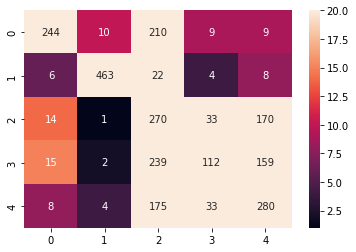

In [139]:
import seaborn as sns
sns.heatmap(conf, annot=True, fmt='d', vmax=20) # a vmax paraméterrel állítjuk be, hogy milyen értéktartományban jelenítse meg az adatokat